In [1]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv("/Users/xinyuanhe/Desktop/413/completedata.csv")
df.head()

,sex,age,wmparcwmlhbankssts,wmparcwmlhcaudalanteriorcingulate,wmparcwmlhcaudalmiddlefrontal,wmparcwmlhcuneus,wmparcwmlhentorhinal,wmparcwmlhfusiform,wmparcwmlhinferiorparietal,wmparcwmlhinferiortemporal,...,rhGausCurvprecentral,rhGausCurvprecuneus,rhGausCurvrostralanteriorcingulate,rhGausCurvrostralmiddlefrontal,rhGausCurvsuperiorfrontal,rhGausCurvsuperiorparietal,rhGausCurvsuperiortemporal,rhGausCurvsupramarginal,rhGausCurvtransversetemporal,rhGausCurvinsula
0,0,25,2401.1,1887.8,7730.7,3174.8,652.2,6997.8,9180.7,5888.5,...,4870,3895,792,3429,8169,4072,4966,3453,356,1987
1,1,26,2236.6,2041.8,5735.7,2080.4,494.2,5334.0,8885.2,4370.8,...,4120,4187,627,3026,7022,3727,3905,3119,326,1830
2,0,27,3725.3,2417.2,7204.6,2879.0,889.7,7162.9,11511.0,8157.2,...,5537,3892,979,4332,10448,4437,5390,3874,403,2380
3,0,32,3614.6,2936.4,6269.4,3402.1,954.8,7135.5,10941.9,7832.2,...,5852,4924,818,4421,9437,4259,5906,3980,400,2368
4,0,32,2999.8,1894.5,6517.6,3659.5,1061.2,6319.1,11548.2,8460.8,...,4570,4198,779,3322,8125,4571,4657,3690,363,2287


In [6]:
train, valid = train_test_split(df, test_size = 0.2)
train_predictors = train.drop(labels = 'age', axis = 1)
train_response = train[['age']]
valid_predictors = valid.drop(labels = 'age', axis = 1)
valid_response = valid[['age']]

In [10]:
cor = train.corr()
cor = np.abs(cor[['age']]).sort_values('age', ascending = False)
cor = cor.drop(labels = ['age', 'sex'], axis = 0)
cor

,age
asegLeftThalamus,0.449621
asegRightThalamus,0.396217
rhGrayVollateralorbitofrontal,0.373744
rhGrayVolsuperiorfrontal,0.370095
lhGrayVolsuperiorfrontal,0.366656
...,...
rhGrayVolpericalcarine,0.004623
wmparcwmlhentorhinal,0.004188
wmparcwmrhentorhinal,0.004071
wmparcwmrhpericalcarine,0.002408


In [9]:
def mae(predicted, actual):
    return float(np.mean(np.abs(actual - predicted)))

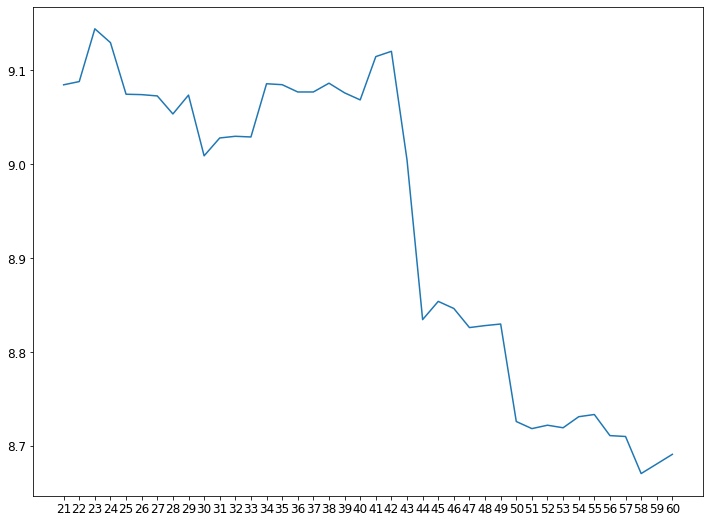

In [46]:
mae_list = []
n_list = []
for i in range(len(cor)-1):
    n = i + 1
    cols_select = np.append(np.array(cor[:n].index), 'sex')
    x_train = train_predictors[cols_select]
    MLR = lm.LinearRegression(fit_intercept = True)
    MLR.fit(x_train, train_response)
    x_valid = valid_predictors[cols_select]
    predict_valid = MLR.predict(x_valid)
    n_list.append(n)
    mae_list.append(mae(predict_valid, valid_response))
    
n_array = np.array(n_list)[20:60]
mae_array = np.array(mae_list)[20:60]

plt.plot(n_array, mae_array)
plt.xticks(n_array,n_array[::1])
plt.show()

In [49]:
num = 43
cols_select = np.append(np.array(cor[:num].index), 'sex')
MLR = lm.LinearRegression(fit_intercept = True)
MLR.fit(train[cols_select], train[['age']])

LinearRegression()

In [50]:
cols_final = np.append(cols_select, 'age')
df[cols_final]

,asegLeftThalamus,asegRightThalamus,rhGrayVollateralorbitofrontal,rhGrayVolsuperiorfrontal,lhGrayVolsuperiorfrontal,rhGrayVolrostralmiddlefrontal,rhGrayVolinferiorparietal,lhGrayVollateralorbitofrontal,asegRightPutamen,lhGrayVolrostralmiddlefrontal,...,rhSurfAreainferiorparietal,rhGausCurvinferiorparietal,lhGrayVolparsorbitalis,rhGrayVolinferiortemporal,rhThickAvgrostralmiddlefrontal,rhGrayVolprecuneus,asegLeftAccumbensarea,rhThickAvgmedialorbitofrontal,sex,age
0,7559.5,7051.7,7579,27289,25764,11081,12677,7890,4775.7,11991,...,4332,4332,1883,7417,2.736,9936,540.5,2.724,0,25
1,8563.6,8300.6,7405,27901,25790,10984,12967,7192,5450.0,10495,...,4064,4064,2326,8876,2.810,10926,477.8,3.356,1,26
2,9594.8,8900.2,10379,32654,26342,12098,17073,9797,5359.7,13081,...,6457,6457,2528,13697,2.458,9879,337.6,2.808,0,27
3,8708.1,8831.0,11135,28754,26289,13053,17692,10263,6067.4,12997,...,6271,6271,2215,12650,2.467,12542,518.3,2.657,0,32
4,9288.5,9429.8,9840,25607,23443,9436,15616,9836,5894.9,11976,...,5837,5837,2325,14261,2.538,10554,477.0,2.554,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,7902.8,7860.4,9276,27220,26954,10276,15927,8809,4390.3,10722,...,5754,5754,2066,12865,2.662,11543,338.8,2.840,1,26
1592,8009.5,7688.6,8131,25091,23864,11439,13264,7571,5218.9,11182,...,4638,4638,1799,11224,2.548,10618,475.1,2.374,1,39
1593,8732.0,8285.9,8990,25263,25523,10379,17165,8121,5535.1,11410,...,6511,6511,1856,12614,2.449,10398,465.9,2.532,1,36
1594,10410.8,9782.7,10998,33126,32013,15802,15700,10444,5491.5,14878,...,6257,6257,1975,15322,2.489,11599,557.7,2.618,0,21


In [51]:
df[cols_final].to_csv('/Users/xinyuanhe/Desktop/413/selecteddata.csv')

In [35]:
MLR.predict(valid[cols_select])

array([[48.50587079],
       [45.98197826],
       [54.67613741],
       [48.19879462],
       [69.10994835],
       [50.96592053],
       [38.15925022],
       [46.85892071],
       [37.52367887],
       [21.78023745],
       [44.31821978],
       [46.92776538],
       [43.58519518],
       [60.93789487],
       [49.69559614],
       [35.92241725],
       [44.62870444],
       [32.05089134],
       [41.78974636],
       [43.3962468 ],
       [41.73154508],
       [37.64154692],
       [58.3640044 ],
       [37.97306554],
       [23.16239255],
       [50.66972372],
       [36.34284382],
       [34.56560144],
       [32.65022221],
       [49.89288662],
       [60.85757914],
       [50.25758611],
       [44.46989075],
       [35.04437481],
       [48.33501657],
       [46.22935753],
       [42.80315042],
       [28.31092865],
       [33.70890135],
       [49.13413433],
       [37.30759659],
       [50.09781007],
       [36.77104414],
       [28.60988377],
       [47.27069831],
       [41

In [36]:
mae(MLR.predict(valid[cols_select]), valid[['age']])

9.004246948380176

In [37]:
test = pd.read_csv('/Users/xinyuanhe/Desktop/test_complete_data.csv').set_index('subject_ID')
test

,sex,rhMeanCurvcaudalanteriorcingulate,rhMeanCurvcaudalmiddlefrontal,rhMeanCurvcuneus,rhMeanCurventorhinal,rhMeanCurvfusiform,rhMeanCurvinferiorparietal,rhMeanCurvinferiortemporal,rhMeanCurvisthmuscingulate,rhMeanCurvlateraloccipital,...,rhGausCurvprecentral,rhGausCurvprecuneus,rhGausCurvrostralanteriorcingulate,rhGausCurvrostralmiddlefrontal,rhGausCurvsuperiorfrontal,rhGausCurvsuperiorparietal,rhGausCurvsuperiortemporal,rhGausCurvsupramarginal,rhGausCurvtransversetemporal,rhGausCurvinsula
subject_ID,,,,,,,,,,,,,,,,,,,,,
CNBD_00011,0,0.118,0.116,0.137,0.136,0.123,0.122,0.117,0.123,0.140,...,0.032,0.030,0.028,0.039,0.034,0.032,0.029,0.026,0.029,0.034
CNBD_00014,1,0.119,0.120,0.147,0.121,0.130,0.122,0.151,0.132,0.148,...,0.028,0.036,0.027,0.038,0.029,0.030,0.028,0.028,0.037,0.038
CNBD_00015,0,0.124,0.122,0.149,0.118,0.133,0.126,0.130,0.111,0.152,...,0.029,0.032,0.029,0.039,0.036,0.033,0.028,0.032,0.030,0.029
CNBD_00029,0,0.133,0.120,0.140,0.093,0.135,0.137,0.128,0.126,0.149,...,0.032,0.033,0.033,0.037,0.033,0.031,0.028,0.032,0.041,0.032
CNBD_00046,1,0.121,0.125,0.140,0.131,0.137,0.136,0.138,0.145,0.145,...,0.030,0.032,0.029,0.033,0.031,0.031,0.028,0.025,0.037,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNBD_02815,0,0.137,0.114,0.151,0.121,0.128,0.120,0.143,0.131,0.135,...,0.035,0.027,0.047,0.033,0.032,0.033,0.025,0.025,0.028,0.028
CNBD_02818,1,0.140,0.102,0.123,0.141,0.123,0.125,0.134,0.129,0.138,...,0.034,0.026,0.039,0.031,0.027,0.033,0.027,0.030,0.033,0.021
CNBD_02828,0,0.132,0.105,0.141,0.129,0.120,0.120,0.109,0.129,0.130,...,0.026,0.029,0.026,0.032,0.028,0.028,0.021,0.024,0.030,0.019


In [42]:
result = pd.DataFrame(MLR.predict(test[cols_select]), index = test.index, columns = ['age'])
result.to_csv('/Users/xinyuanhe/Desktop/result.csv')